In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [4]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 13.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.2-py3-none-any.whl size=25313840 sha256=4e092a3c3fc8f7600bbf237ce0b9543afc04d096ef9b7ebb13e28506c17e501e
  Stored in directory

In [5]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=train_b.target_names)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

preprocessing train...
language: en
train sequence lengths:
	mean : 308
	95percentile : 837
	99percentile : 1938


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 343
	95percentile : 979
	99percentile : 2562


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
376/376 [==============================] - 96s 224ms/step - loss: 1.0749 - accuracy: 0.5248
Epoch 2/2
376/376 [==============================] - 47s 125ms/step - loss: 20.5998 - accuracy: 0.2861


done.
Visually inspect loss plot and select learning rate associated with falling loss


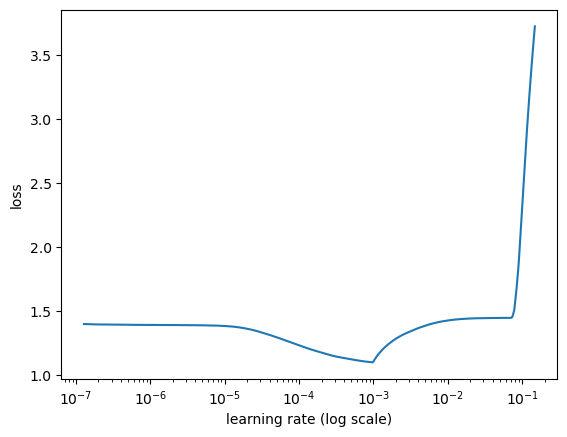

In [6]:
learner.lr_find(show_plot=True, max_epochs=2)

In [7]:
learner.fit_onecycle(8e-5, 4)



begin training using onecycle policy with max lr of 8e-05...
Epoch 1/4
377/377 [==============================] - 111s 270ms/step - loss: 0.4199 - accuracy: 0.8538 - val_loss: 0.2086 - val_accuracy: 0.9394
Epoch 2/4
377/377 [==============================] - 100s 264ms/step - loss: 0.1537 - accuracy: 0.9557 - val_loss: 0.2236 - val_accuracy: 0.9328
Epoch 3/4
377/377 [==============================] - 100s 264ms/step - loss: 0.1177 - accuracy: 0.9708 - val_loss: 0.2536 - val_accuracy: 0.9374
Epoch 4/4
377/377 [==============================] - 100s 264ms/step - loss: 0.0399 - accuracy: 0.9916 - val_loss: 0.2530 - val_accuracy: 0.9421


In [8]:
learner.validate(class_names=t.get_classes())

47/47 [==============================] - 18s 331ms/step
                        precision    recall  f1-score   support

           alt.atheism       0.93      0.86      0.89       319
         comp.graphics       0.95      0.96      0.96       389
               sci.med       0.97      0.95      0.96       396
soc.religion.christian       0.92      0.98      0.95       398

              accuracy                           0.94      1502
             macro avg       0.94      0.94      0.94      1502
          weighted avg       0.94      0.94      0.94      1502



array([[274,   8,   8,  29],
       [  7, 375,   5,   2],
       [  5,  10, 377,   4],
       [  8,   1,   0, 389]])

In [9]:
learner.view_top_losses(n=1, preproc=t)

47/47 [==============================] - 15s 323ms/step
----------
id:230 | loss:7.69 | true:sci.med | pred:soc.religion.christian)



In [10]:
print(x_test[521])

From: jim.zisfein@factory.com (Jim Zisfein) 
Subject: Data of skull
Distribution: world
Organization: Invention Factory's BBS - New York City, NY - 212-274-8298v.32bis
Reply-To: jim.zisfein@factory.com (Jim Zisfein) 
Lines: 11

GT> From: gary@concave.cs.wits.ac.za (Gary Taylor)
GT> Hi, We are trying to develop a image reconstruction simulation for the skull

You could do high resolution CT (computed tomographic) scanning of
the skull.  Many CT scanners have an algorithm to do 3-D
reconstructions in any plane you want.  If you did reconstructions
every 2 degrees or so in all planes, you could use the resultant
images to create user-controlled animation.
---
 . SLMR 2.1 . E-mail: jim.zisfein@factory.com (Jim Zisfein)
                                                                                                                        



Prediction

In [11]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [12]:
predictor.predict('Jesus Christ is the central figure of Christianity.')


1/1 [==============================] - 0s 90ms/step


'soc.religion.christian'

In [13]:
predictor.explain('Jesus Christ is the central figure of Christianity.')

79/79 [==============================] - 2s 25ms/step


In [14]:
predictor.save('/tmp/my_20newsgroup_predictor')

In [15]:
reloaded_predictor = ktrain.load_predictor('/tmp/my_20newsgroup_predictor')

In [16]:
reloaded_predictor.predict('Jesus Christ is the central figure of Christianity.')

1/1 [==============================] - 2s 2s/step


'soc.religion.christian'

In [17]:
reloaded_predictor.predict_proba('Jesus Christ is the central figure of Christianity.')

1/1 [==============================] - 0s 84ms/step


array([3.3585224e-03, 3.8718837e-04, 3.3371171e-04, 9.9592054e-01],
      dtype=float32)

In [18]:
reloaded_predictor.get_classes()

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']